<a href="https://colab.research.google.com/github/bodong408/Machine-Learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout,  Flatten, LSTM
from tensorflow.keras.models import Model

In [11]:
import numpy as np
X1 = np.array([x+4 for x in range(0, 160, 4)])
print(X1)
X2 = np.array([x+5 for x in range(0, 200, 5)])
print(X2)
X=np.column_stack((X1, X2))
X = np.array(X).reshape(20, 2, 2)
print(X)

[[[  4   5]
  [  8  10]]

 [[ 12  15]
  [ 16  20]]

 [[ 20  25]
  [ 24  30]]

 [[ 28  35]
  [ 32  40]]

 [[ 36  45]
  [ 40  50]]

 [[ 44  55]
  [ 48  60]]

 [[ 52  65]
  [ 56  70]]

 [[ 60  75]
  [ 64  80]]

 [[ 68  85]
  [ 72  90]]

 [[ 76  95]
  [ 80 100]]

 [[ 84 105]
  [ 88 110]]

 [[ 92 115]
  [ 96 120]]

 [[100 125]
  [104 130]]

 [[108 135]
  [112 140]]

 [[116 145]
  [120 150]]

 [[124 155]
  [128 160]]

 [[132 165]
  [136 170]]

 [[140 175]
  [144 180]]

 [[148 185]
  [152 190]]

 [[156 195]
  [160 200]]]


In [12]:
y = [sum(y) for y in [sum(x) for x in X]]
y = np.array(y)
print(y)


[ 27  63  99 135 171 207 243 279 315 351 387 423 459 495 531 567 603 639
 675 711]


In [21]:
input_layer = Input(shape=(2,2))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
lstm2 = LSTM(50, activation='relu', return_sequences=True)(lstm1)
lstm3 = LSTM(25, activation='relu')(lstm2)
dense1 = Dense(10, activation='relu')(lstm3)
output_layer = Dense(1)(dense1)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

In [22]:
model_history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 178630.9688
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 178236.6562
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 177783.1562
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 177208.1719
Epoch 5/1000
1/1 [==============================] - 0s 990us/step - loss: 176493.7812
Epoch 6/1000
1/1 [==============================] - 0s 955us/step - loss: 175773.7969
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 174992.5469
Epoch 8/1000
1/1 [==============================] - 0s 938us/step - loss: 174093.0312
Epoch 9/1000
1/1 [==============================] - 0s 931us/step - loss: 173092.2188
Epoch 10/1000
1/1 [==============================] - 0s 918us/step - loss: 171982.5938
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 170735.0938
Epoch 12/1000
1/1 [==============================] - 0s 962us/st

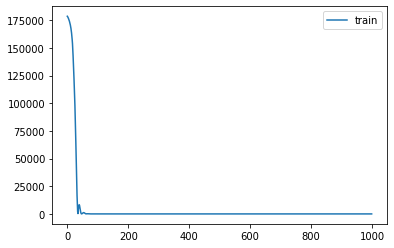

In [24]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'loss')
plt.legend(['train'], loc='upper right')

In [27]:
X_test = np.array([[200, 225], ## 859
                    [204,230]])
X_test = X_test.reshape((1, 2, 2))
X_test = tf.cast(X_test, tf.float32)
y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[862.47314]]
